In [2]:
import sys
sys.path.insert(0, '../..')  # Füge das übergeordnete Verzeichnis zum Python-Pfad hinzu
from utils_functions import to_float_array, df_d0, dataframe1
import glob
import os
import pandas as pd
from IPython.display import display
import numpy as np

In [3]:
# Funktion zur Verarbeitung der Influx-Daten
def Influx_data(df1, x, y, z, w):
    """
    Erstellt einen DataFrame mit Mittelwerten und Standardabweichungen
    aus einem CSV-DataFrame und vier Zeilenindizes.
    
    Parameter:
    - df1: Eingabe-DataFrame (aus CSV)
    - x, y, z, w: Zeilenindizes für Zeit und die drei Messungen
    
    Rückgabe:
    - DataFrame mit Spalten: Time, 1.Messung, 2.Messung, 3.Messung, 
      Mittelwerte, Standardabweichung
    """
    df1 = df1.replace('OVER', np.nan)
    mM_10 = pd.DataFrame()
    mM_1= pd.DataFrame()
    mM_0_1 = pd.DataFrame()
    Hepes= pd.DataFrame()
    results = pd.DataFrame()
    results["Time"] = to_float_array(np.array(df1.iloc[x])[1:])
    mM_10["Time"] = to_float_array(np.array(df1.iloc[x])[1:])
    mM_1["Time"] = to_float_array(np.array(df1.iloc[x])[1:])
    mM_0_1["Time"] = to_float_array(np.array(df1.iloc[x])[1:])
    Hepes["Time"] = to_float_array(np.array(df1.iloc[x])[1:])
    #10mM    
    mM_10["1.Messung"] = df_d0(to_float_array(np.array(df1.iloc[y])[1:]))
    mM_10["2.Messung"] = df_d0(to_float_array(np.array(df1.iloc[z])[1:]))
    mM_10["3.Messung"] = df_d0(to_float_array(np.array(df1.iloc[w])[1:]))
    
    # Berechne Mittelwert über die ersten drei Messung-Spalten
    mittelwerte1 = mM_10[["1.Messung", "2.Messung", "3.Messung"]].mean(axis=1).tolist()
    results["10 mM Mittelwerte"] = mittelwerte1
    
    # Berechne Standardabweichung
    standardabweichung1 = mM_10[["1.Messung", "2.Messung", "3.Messung"]].std(axis=1).tolist()
    results["10 mM Standardabweichung"] = standardabweichung1
    
    #1mM
       
    mM_1["1.Messung"] = df_d0(to_float_array(np.array(df1.iloc[y+3])[1:]))
    mM_1["2.Messung"] = df_d0(to_float_array(np.array(df1.iloc[z+3])[1:]))
    mM_1["3.Messung"] = df_d0(to_float_array(np.array(df1.iloc[w+3])[1:]))
    
    # Berechne Mittelwert über die ersten drei Messung-Spalten
    mittelwerte2 = mM_1[["1.Messung", "2.Messung", "3.Messung"]].mean(axis=1).tolist()
    results["1 mM Mittelwerte"] = mittelwerte2
    
    # Berechne Standardabweichung
    standardabweichung2 = mM_1[["1.Messung", "2.Messung", "3.Messung"]].std(axis=1).tolist()
    results["1 mM Standardabweichung"] = standardabweichung2
    
    #0,1 mM
        
    mM_0_1["1.Messung"] = df_d0(to_float_array(np.array(df1.iloc[y+6])[1:]))
    mM_0_1["2.Messung"] = df_d0(to_float_array(np.array(df1.iloc[z+6])[1:]))
    mM_0_1["3.Messung"] = df_d0(to_float_array(np.array(df1.iloc[w+6])[1:]))
    
    
    # Berechne Mittelwert über die ersten drei Messung-Spalten
    mittelwerte3 = mM_0_1[["1.Messung", "2.Messung", "3.Messung"]].mean(axis=1).tolist()
    results["0,1 mM Mittelwerte"] = mittelwerte3
    
    # Berechne Standardabweichung
    standardabweichung3 = mM_0_1[["1.Messung", "2.Messung", "3.Messung"]].std(axis=1).tolist()
    results["0,1 mM Standardabweichung"] = standardabweichung3
    
    #Hepes
        
    Hepes["1.Messung"] = df_d0(to_float_array(np.array(df1.iloc[y+9])[1:]))
    Hepes["2.Messung"] = df_d0(to_float_array(np.array(df1.iloc[z+9])[1:]))
    Hepes["3.Messung"] = df_d0(to_float_array(np.array(df1.iloc[w+9])[1:]))
    
    mittelwerte3 = Hepes[["1.Messung", "2.Messung", "3.Messung"]].mean(axis=1).tolist()
    results["0,1 mM Mittelwerte"] = mittelwerte3
    
    # Berechne Standardabweichung
    standardabweichung3 = Hepes[["1.Messung", "2.Messung", "3.Messung"]].std(axis=1).tolist()
    results["0,1 mM Standardabweichung"] = standardabweichung3
    # Stelle sicher, dass 'Time' numeric ist
    
    merged = mM_10.merge(mM_1, on='Time', how='outer', suffixes=('_10','_1'))
    merged = merged.merge(mM_0_1, on='Time', how='outer')
    merged = merged.merge(Hepes, on='Time', how='outer', suffixes=('_0.1','_Hepes'))
    merged = merged.sort_values('Time').reset_index(drop=True)
    return results, merged

In [ ]:
# Daten einlesen in Dataframes
# Daten einlesen in Dataframes
data_path = '/workspaces/EWT/EWT6/data/ETW6.ods'
df_I_PfFNT_ilacco1_0 = pd.read_excel(data_path, engine='odf', sheet_name="Sheet1", skiprows=37)
df_I_PfFNT_ilacco1_1= pd.read_excel(data_path, engine='odf', sheet_name="Sheet4", skiprows=36)
df_I_PfFNT_ilacco1_2= pd.read_excel(data_path, engine='odf', sheet_name="Sheet6", skiprows=36)
df_I_PfFNT_FP_ilacco1 = pd.read_excel(data_path, engine='odf', sheet_name="Sheet7", skiprows=36)
df_I_PfFNT_ilacco1_0_50µM_CCCP = pd.read_excel(data_path, engine='odf', sheet_name="Sheet8", skiprows=36)
df_I_PfFNT_ilacco1_1_50µM_CCCP = pd.read_excel(data_path, engine='odf', sheet_name="Sheet9", skiprows=36)
df_I_PfFNT_ilacco1_2_50µM_CCCP = pd.read_excel(data_path, engine='odf', sheet_name="Sheet10", skiprows=36)
df_I_PfFNT_FP_ilacco1_50µM_CCCP = pd.read_excel(data_path, engine='odf', sheet_name="Sheet11", skiprows=36)

data_frames = [df_I_PfFNT_ilacco1_0, df_I_PfFNT_ilacco1_1, df_I_PfFNT_ilacco1_2,
               df_I_PfFNT_FP_ilacco1, df_I_PfFNT_ilacco1_0_50µM_CCCP, df_I_PfFNT_ilacco1_1_50µM_CCCP,
               df_I_PfFNT_ilacco1_2_50µM_CCCP, df_I_PfFNT_FP_ilacco1_50µM_CCCP]
# Daten verarbeiten
I_PfFNT_ilacco1_0, M1 = Influx_data(df_I_PfFNT_ilacco1_0,3,5,6,7)
I_PfFNT_ilacco1_1,M2 = Influx_data(df_I_PfFNT_ilacco1_1,3,5,6,7)
I_PfFNT_ilacco1_2, M3 = Influx_data(df_I_PfFNT_ilacco1_2,3,5,6,7)
I_PfFNT_FP_ilacco1, M4 = Influx_data(df_I_PfFNT_FP_ilacco1,3,5,6,7)
I_PfFNT_ilacco1_0_50μM_CCCP, M5 = Influx_data(df_I_PfFNT_ilacco1_0_50μM_CCCP,3,5,6,7)
I_PfFNT_ilacco1_1_50μM_CCCP, M6 = Influx_data(df_I_PfFNT_ilacco1_1_50μM_CCCP,3,5,6,7)
I_PfFNT_ilacco1_2_50μM_CCCP, M7 = Influx_data(df_I_PfFNT_ilacco1_2_50μM_CCCP,3,5,6,7)
I_PfFNT_FP_ilacco1_50μM_CCCP, M8 = Influx_data(df_I_PfFNT_FP_ilacco1_50μM_CCCP,3,5,6,7)


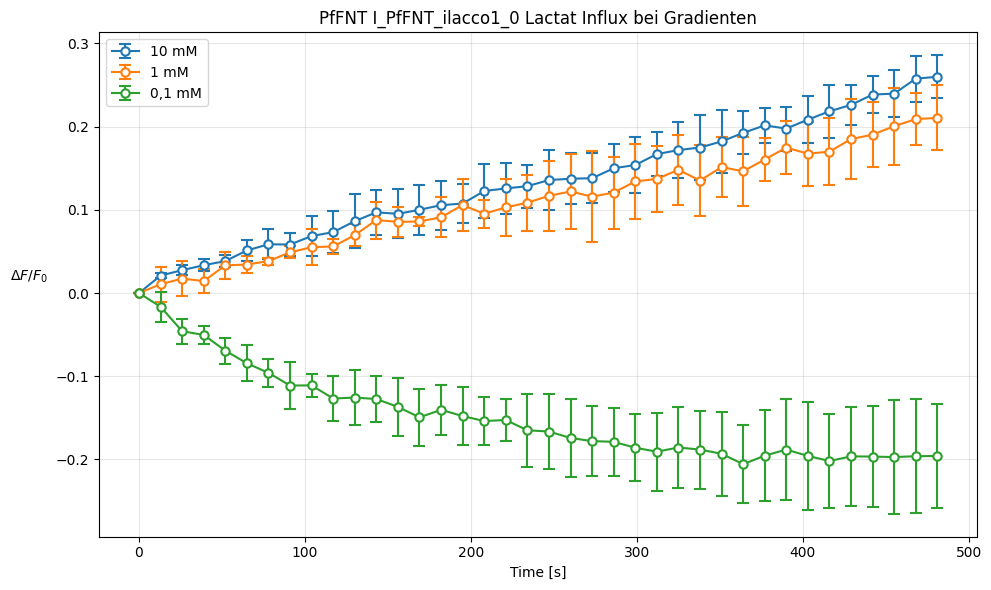

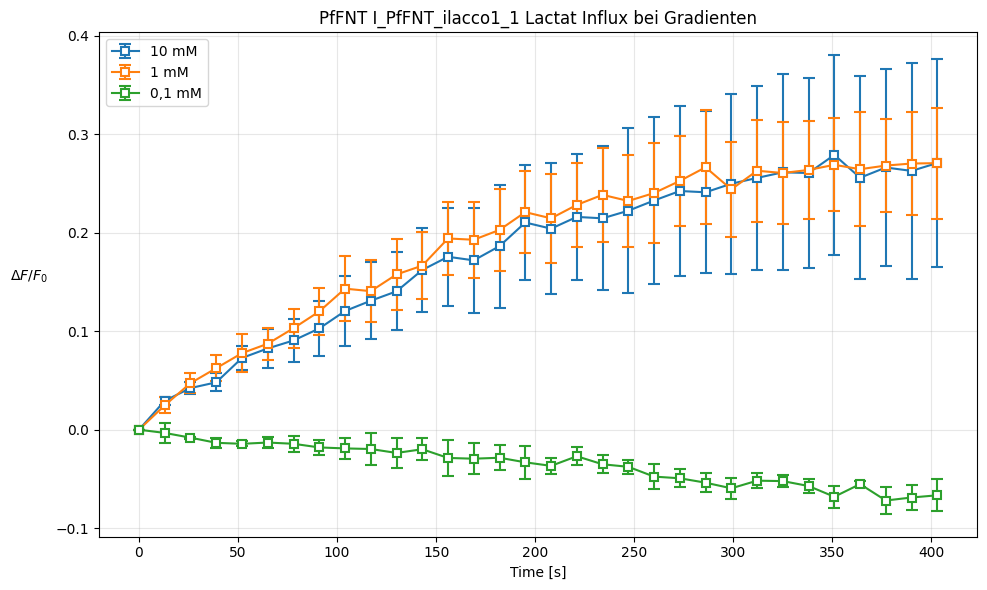

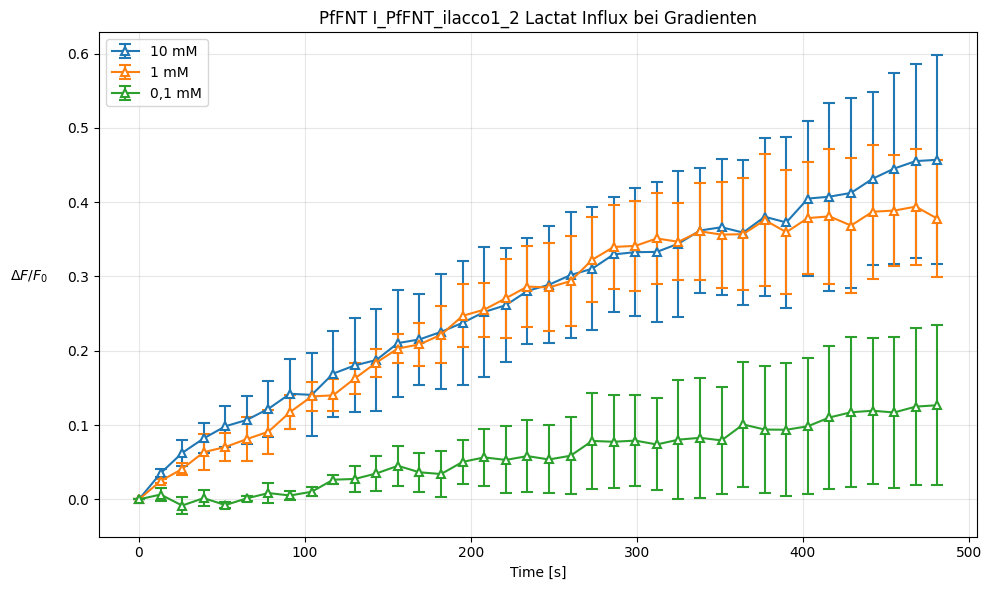

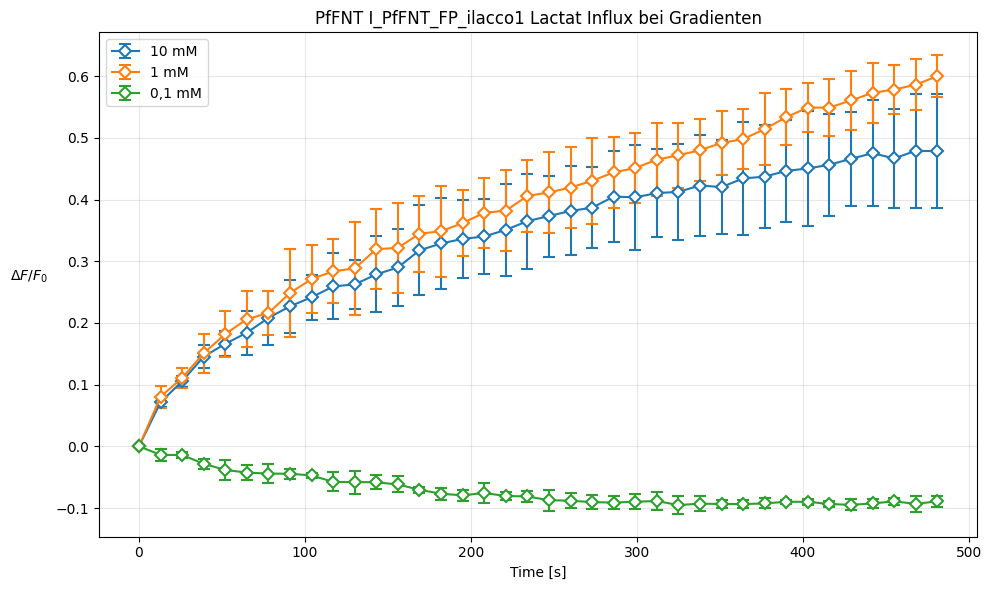

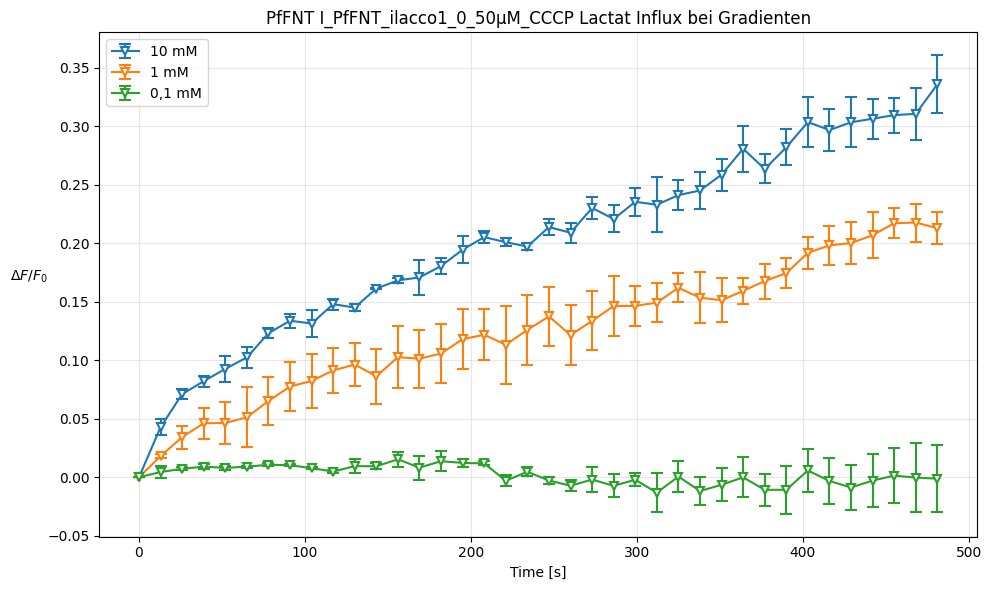

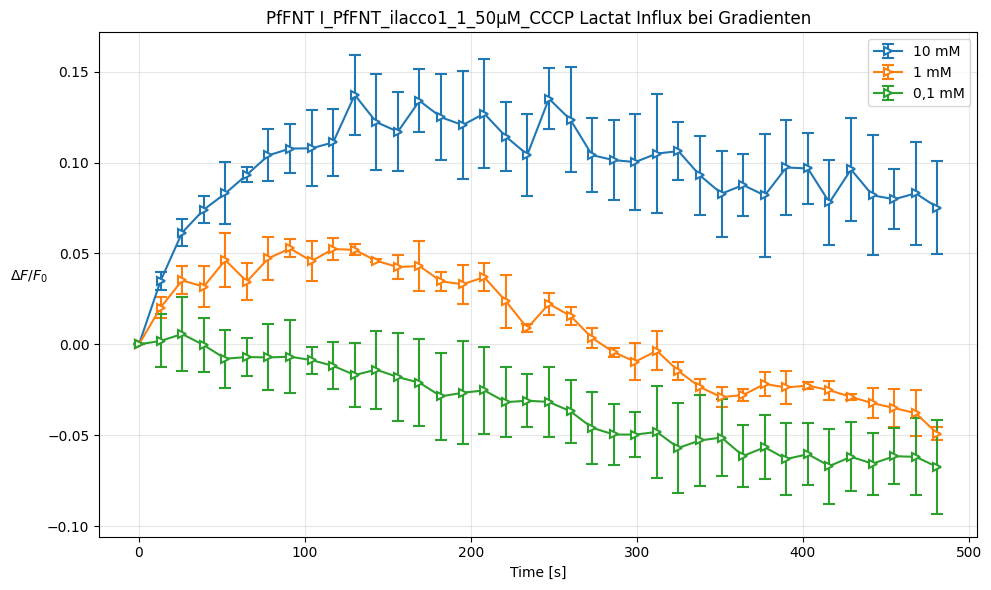

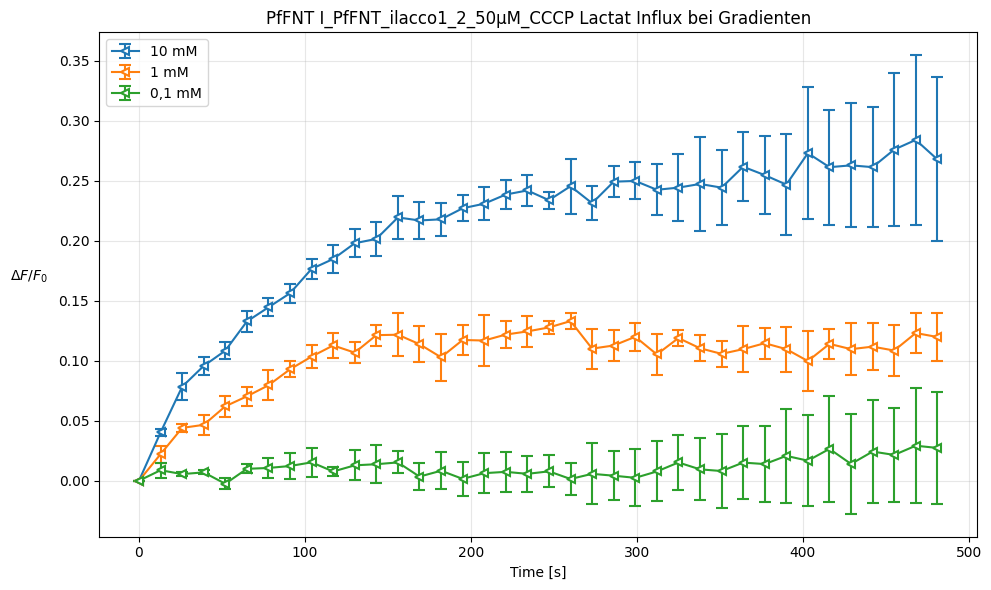

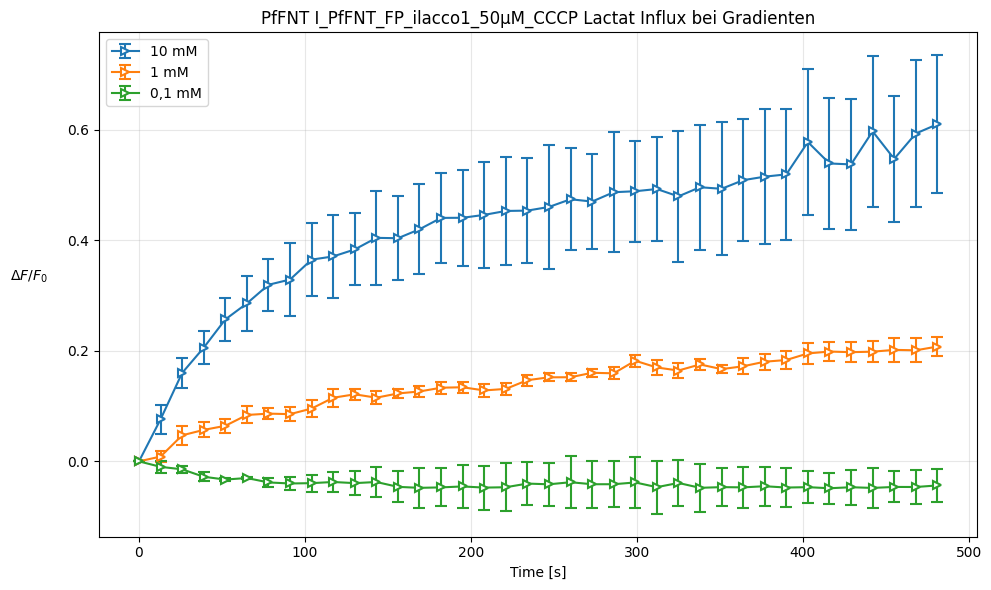

In [6]:
from matplotlib import pyplot as plt
data_frames = [
    I_PfFNT_ilacco1_0,
    I_PfFNT_ilacco1_1,
    I_PfFNT_ilacco1_2,
    I_PfFNT_FP_ilacco1,
    I_PfFNT_ilacco1_0_50μM_CCCP,
    I_PfFNT_ilacco1_1_50μM_CCCP,
    I_PfFNT_ilacco1_2_50μM_CCCP,
    I_PfFNT_FP_ilacco1_50μM_CCCP]
concentrations = ['10 mM', '1 mM', '0,1 mM']

labels = ["I_PfFNT_ilacco1_0", 
          "I_PfFNT_ilacco1_1",
          "I_PfFNT_ilacco1_2",
          "I_PfFNT_FP_ilacco1",
          "I_PfFNT_ilacco1_0_50μM_CCCP",
          "I_PfFNT_ilacco1_1_50μM_CCCP",
          "I_PfFNT_ilacco1_2_50μM_CCCP",
          "I_PfFNT_FP_ilacco1_50μM_CCCP"]
markers_list = ['o', 's', '^', 'D', 'v', '>', '<', '>']

for df, label, marker in zip(data_frames, labels, markers_list):
    plt.figure(figsize=(10, 6))
    plt.title(f'PfFNT {label} Lactat Influx bei Gradienten')
    plt.xlabel('Time [s]')
    plt.ylabel(r'$\Delta F/F_0$', rotation=0, labelpad=12)
    ax = plt.gca()
    ax.yaxis.set_label_coords(-0.08, 0.5)
    plt.grid(alpha=0.3)
    plt.tight_layout()

    for conc in concentrations:
        plt.errorbar(df["Time"], df[f"{conc} Mittelwerte"], yerr=df[f"{conc} Standardabweichung"], 
                        marker=marker, linestyle='-', label=conc, capsize=4, 
                        markerfacecolor='white', markeredgewidth=1.5, markersize=6)
    plt.legend()
    #outpath = os.path.join('..', 'figueres', f'{name}_{conc}_plot.png')
    #plt.savefig(outpath, dpi=300, bbox_inches='tight')
    #print(f'Saved plot: {outpath}')
    plt.show()


Saved combined plot: ../figueres/PfFNT_combined_all.png


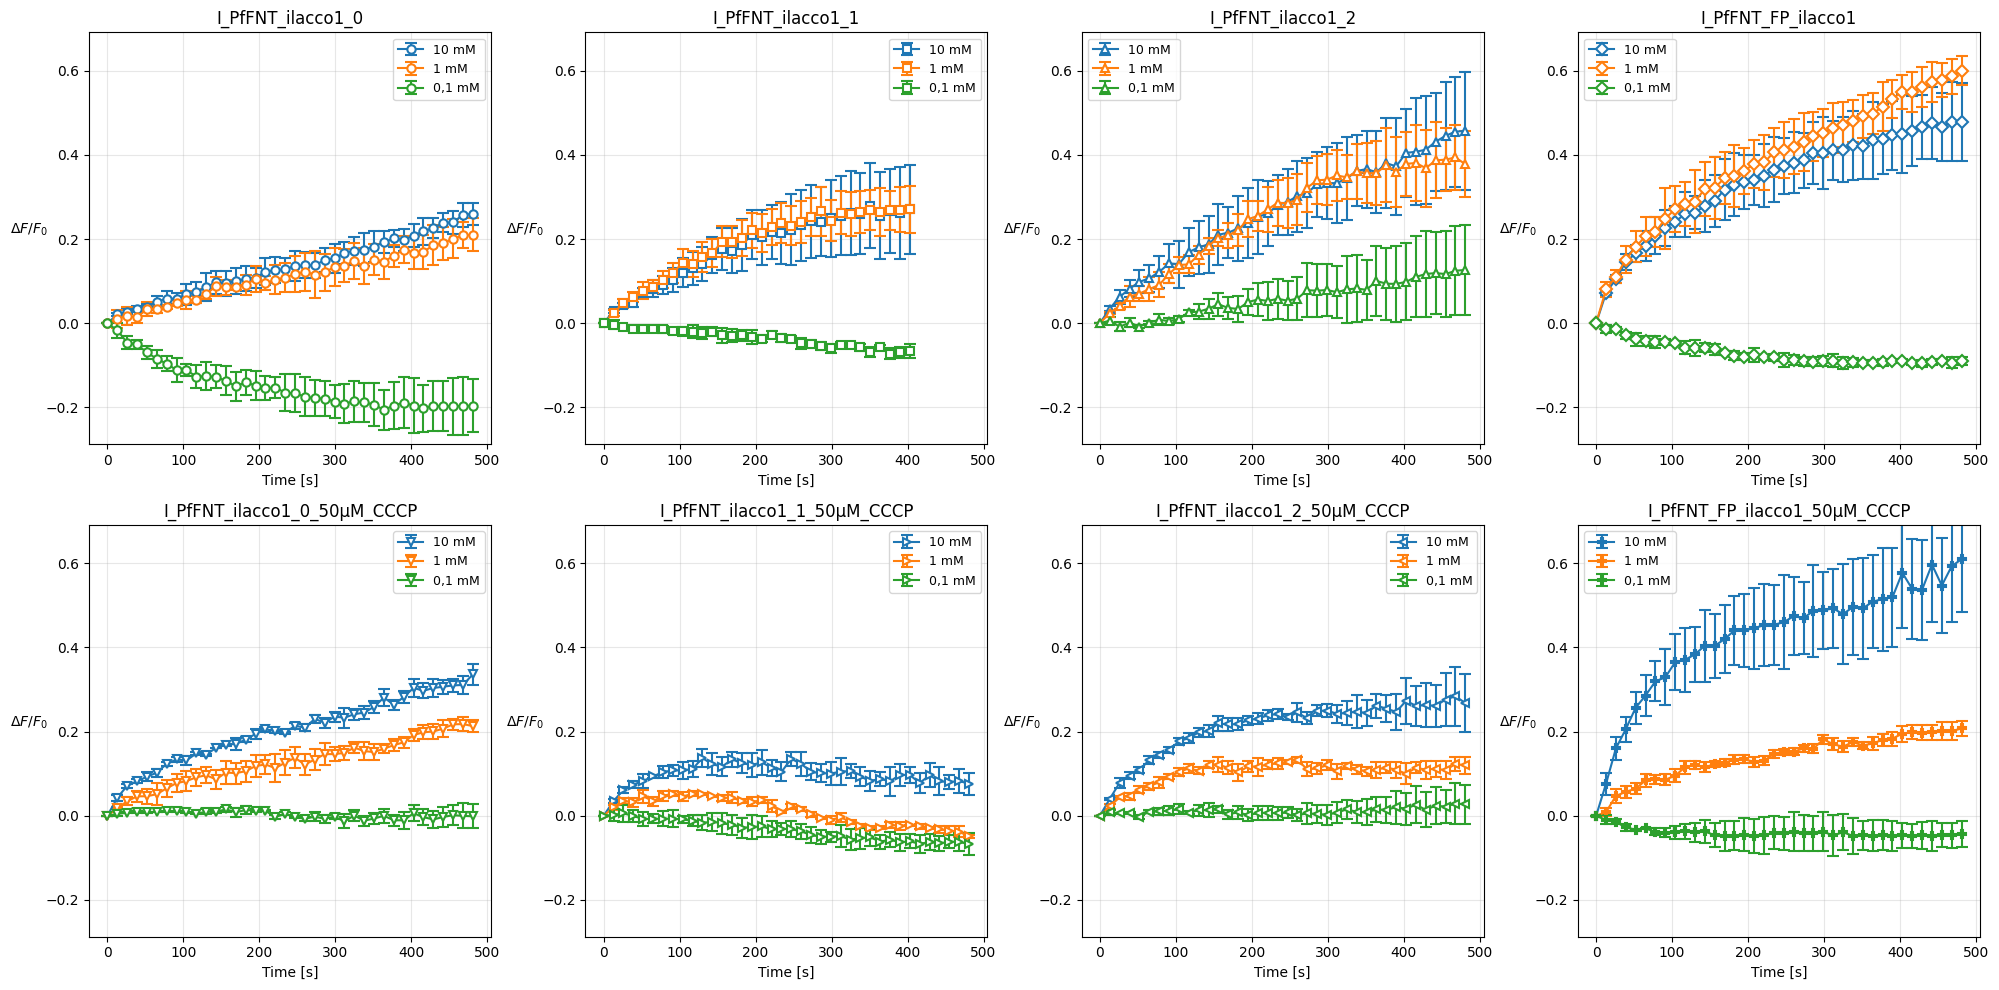

In [7]:
# Kombiniere alle Plots in eine 2x4 Subplot-Figur mit uniformer Achsenskalierung
import matplotlib.pyplot as plt

data_frames_list = [
    ('I_PfFNT_ilacco1_0', 'o', I_PfFNT_ilacco1_0),
    ('I_PfFNT_ilacco1_1', 's', I_PfFNT_ilacco1_1),
    ('I_PfFNT_ilacco1_2', '^', I_PfFNT_ilacco1_2),
    ('I_PfFNT_FP_ilacco1', 'D', I_PfFNT_FP_ilacco1),
    ('I_PfFNT_ilacco1_0_50μM_CCCP', 'v', I_PfFNT_ilacco1_0_50μM_CCCP),
    ('I_PfFNT_ilacco1_1_50μM_CCCP', '>', I_PfFNT_ilacco1_1_50μM_CCCP),
    ('I_PfFNT_ilacco1_2_50μM_CCCP', '<', I_PfFNT_ilacco1_2_50μM_CCCP),
    ('I_PfFNT_FP_ilacco1_50μM_CCCP', 'P', I_PfFNT_FP_ilacco1_50μM_CCCP)]

concentrations = ['10 mM', '1 mM', '0,1 mM']

# Erstelle 2x4 Subplot-Grid
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# Sammle alle Daten für uniforme Skalierung
all_times = []
all_values = []

for idx, (name, marker, df) in enumerate(data_frames_list):
    ax = axes[idx]
    
    for conc in concentrations:
        times = df["Time"]
        means = df[f"{conc} Mittelwerte"]
        stds = df[f"{conc} Standardabweichung"]
        
        # Sammle Werte für Skalierung
        all_times.extend(times.values)
        all_values.extend(means.values)
        
        ax.errorbar(times, means, yerr=stds, 
                   marker=marker, linestyle='-', label=conc, capsize=4, 
                   markerfacecolor='white', markeredgewidth=1.5, markersize=6)
    
    ax.set_title(name)
    ax.set_xlabel('Time [s]')
    ax.set_ylabel(r'$\Delta F/F_0$', rotation=0, labelpad=20)
    ax.yaxis.set_label_coords(-0.15, 0.5)
    ax.grid(alpha=0.3)
    ax.legend(loc='best', fontsize=9)

# Berechne und setze uniforme Achsenskalierung
if all_times and all_values:
    x_min, x_max = min(all_times), max(all_times)
    y_min, y_max = min(all_values), max(all_values)
    x_margin = (x_max - x_min) * 0.05
    y_margin = (y_max - y_min) * 0.1
    
    for ax in axes:
        ax.set_xlim(x_min - x_margin, x_max + x_margin)
        ax.set_ylim(y_min - y_margin, y_max + y_margin)

plt.tight_layout()
outpath = os.path.join('..', 'figueres', 'PfFNT_combined_all.png')
plt.savefig(outpath, dpi=300, bbox_inches='tight')
print(f'Saved combined plot: {outpath}')
plt.show()

Saved plot: ../figueres/PfFNT_1mM_comparison.png


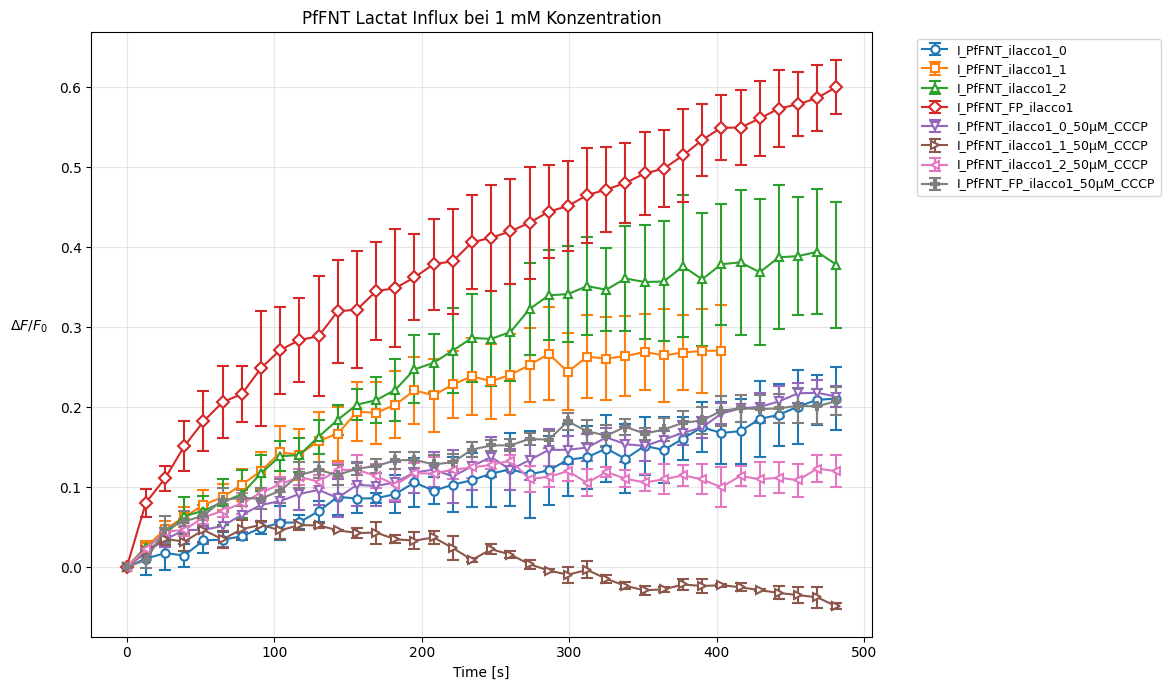

In [8]:
# Plot für alle DataFrames bei 1 mM Konzentration
import matplotlib.pyplot as plt

data_frames_list = [
    ('I_PfFNT_ilacco1_0', 'o', I_PfFNT_ilacco1_0),
    ('I_PfFNT_ilacco1_1', 's', I_PfFNT_ilacco1_1),
    ('I_PfFNT_ilacco1_2', '^', I_PfFNT_ilacco1_2),
    ('I_PfFNT_FP_ilacco1', 'D', I_PfFNT_FP_ilacco1),
    ('I_PfFNT_ilacco1_0_50μM_CCCP', 'v', I_PfFNT_ilacco1_0_50μM_CCCP),
    ('I_PfFNT_ilacco1_1_50μM_CCCP', '>', I_PfFNT_ilacco1_1_50μM_CCCP),
    ('I_PfFNT_ilacco1_2_50μM_CCCP', '<', I_PfFNT_ilacco1_2_50μM_CCCP),
    ('I_PfFNT_FP_ilacco1_50μM_CCCP', 'P', I_PfFNT_FP_ilacco1_50μM_CCCP)]

plt.figure(figsize=(12, 7))

for name, marker, df in data_frames_list:
    times = df["Time"]
    means = df["1 mM Mittelwerte"]
    stds = df["1 mM Standardabweichung"]
    
    plt.errorbar(times, means, yerr=stds, 
                marker=marker, linestyle='-', label=name, capsize=4, 
                markerfacecolor='white', markeredgewidth=1.5, markersize=6)

plt.xlabel('Time [s]')
plt.ylabel(r'$\Delta F/F_0$', rotation=0, labelpad=20)
plt.title('PfFNT Lactat Influx bei 1 mM Konzentration')
ax = plt.gca()
ax.yaxis.set_label_coords(-0.08, 0.5)
plt.grid(alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.tight_layout()

outpath = os.path.join('..', 'figueres', 'PfFNT_1mM_comparison.png')
plt.savefig(outpath, dpi=300, bbox_inches='tight')
print(f'Saved plot: {outpath}')
plt.show()